# Johnson noise analysis and plots

Generate gain plots, calculate $G$ and $k_B$, error analysis

$G = \int \frac{(g(f))^2}{1 + (2\pi f RC)^2}$

$k_B = \frac{V^2}{4RTG}$

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
def G(f, g, R, C, df=0.01):
    """
    Computes G using trapezoidal rule and returns sum and error
    f is a list with frequency domain given in kHz
    g is a list with corresponding gain as function of frequency
    R is the resistance in kOhm
    C is the capacitance in pF
    df is optional but should be finer than precision of f
    """
    # TODO add error analysis
    R *= 1000
    C *= 1.0e-12
    S = 0
    if len(f) != len(g):
        print("Dimensions don't match!")
        return -1, -1
    for i in range(len(f)-1):
        n = int(round((f[i+1]-f[i])/df, 2))
        fp = [f[i] + j*df for j in range(n+1)]
        for j in range(n):
            S += 1.0e3 * df * (g[i] + (g[i+1]-g[i])*(j+0.5)*df/(f[i+1]-f[i]))**2 / (1 + 1.0e6 * (2*np.pi*R*C*(fp[j] + fp[j+1])/2)**2)
            # print(S)
        S += 1.0e3 * (f[i+1] - fp[-1]) * (g[i] + (g[i+1]-g[i])*(f[i+1]/2 + fp[-1]/2 - f[i])/(f[i+1]-f[i]))**2 / 1.0e6 * (1 + (2*np.pi*R*C*(f[i+1] + fp[-1])/2)**2)
        # print(S)
    return S

In [3]:
def plotgp(f, g, R, C, df=0.1):
    """
    Formats gain data to visualize G integral
    f is a list with frequency domain given in kHz
    g is a list with corresponding gain as function of frequency
    R is the resistance in kOhm
    C is the capacitance in pF
    df is optional but should be finer than precision of f
    """
    # TODO add error analysis
    R *= 1000
    C *= 1.0e-12
    x = []
    y = []
    if len(f) != len(g):
        print("Dimensions don't match!")
        return -1, -1
    for i in range(len(f)-1):
        n = int(round((f[i+1]-f[i])/df, 2))
        fp = [f[i] + j*df for j in range(n+1)]
        for j in range(n):
            xp = f[i] + j*df
            # nxp = xp + j*df
            x.append(xp)
            y.append((g[i] + (g[i+1]-g[i])*j*df/(f[i+1]-f[i]))**2 / (1 + 1.0e6 * (2*np.pi*R*C*xp)**2))
        # print((1 + 1.0e6 * (2*np.pi*R*C*(f[i] + f[i+1])/2)**2))
        # print(y)
    return x, y

In [ ]:
# test

<Figure size 432x288 with 0 Axes>

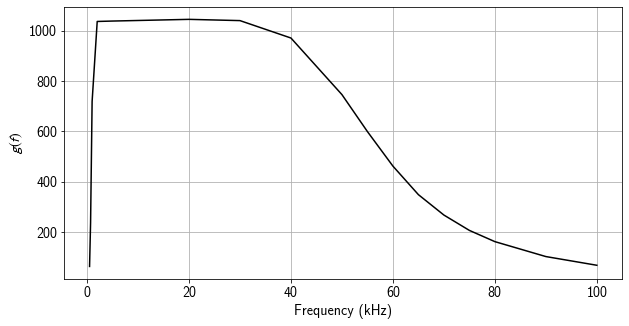

<Figure size 432x288 with 0 Axes>

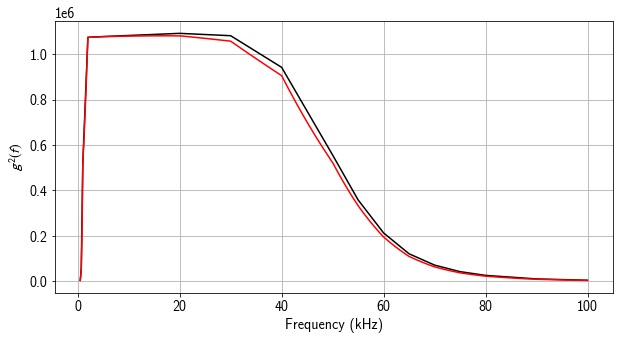

53018423276.8987
1.2707277085612571e-23


In [16]:
# calibration data for g(f)
x = """| 0.5 |
| 0.7 |
| 1   |
| 2   |
| 5   |
| 20  |
| 30  |
| 40  |
| 50  |
| 55  |
| 60  |
| 65  |
| 70  |
| 75  |
| 80  |
| 90  |
| 100 |
""".strip().replace(' ', '').replace('|', '').split('\n')
y = """| 62.3852903 |
| 235.873718 |
| 718.093128 |
| 1036.25048 |
| 1037.89892 |
| 1044.64592 |
| 1039.68107 |
| 970.441208 |
| 745.542523 |
| 598.54541  |
| 461.269571 |
| 347.821629 |
| 266.723587 |
| 205.672541 |
| 161.030141 |
| 101.677054 |
| 67.0674234 |
""".strip().replace(' ', '').replace('|', '').split('\n')
err = """| 0.29326454 |
| 0.82350091 |
| 12.5819337 |
| 0.86726149 |
| 1.18156375 |
| 0.42786788 |
| 1.40347296 |
| 0.9148608  |
| 0.63096115 |
| 0.49798151 |
| 4.5753711  |
| 0.17423825 |
| 0.08250784 |
| 0.10984315 |
| 0.24767699 |
| 0.0658758  |
| 0.02900457 |

""".strip().replace(' ', '').replace('|', '').split('\n')
x = list(map(float, x))
y = list(map(float, y))
err = list(map(float, err))
R = 10
V = (2.93**2 - 0.83**2)**0.5
C = 80

plt.clf()
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
#plt.rcParams.update({'font.family': 'cmr10', 'mathtext.fontset': 'cm'})
plt.rcParams.update({'font.family': 'cmss10', 'mathtext.fontset': 'stixsans'})
plt.ylabel('$g(f)$')
plt.xlabel('Frequency (kHz)')
plt.grid(b=True)
plt.plot(x, y, 'k')
# plt.errorbar(x, y, yerr=err, color='r', fmt='.', ecolor='r', capsize=3)
plt.show()

plt.clf()
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
#plt.rcParams.update({'font.family': 'cmr10', 'mathtext.fontset': 'cm'})
plt.rcParams.update({'font.family': 'cmss10', 'mathtext.fontset': 'stixsans'})
plt.ylabel('$g^2(f)$')
plt.xlabel('Frequency (kHz)')
plt.ticklabel_format(axis='y',style='sci', scilimits=(0,0))
plt.grid(b=True)
plt.plot(x, [g**2 for g in y], 'k')
gpx, gpy = plotgp(x, y, R, C, df=0.1)
# plt.xlim(1, 6)
plt.plot(gpx, gpy, 'r')
# plt.errorbar(x, y, yerr=err, color='r', fmt='.', ecolor='r', capsize=3)
plt.show()

# gross estimate for trapezoidal rule
# S = 0
# for i in range(len(x)-1):
#     S += ((y[i] + y[i+1])/2)**2 * (x[i+1]-x[i])
#     print(round(((y[i] + y[i+1])/2)**2, 1), '\t', round(x[i+1]-x[i],2), '\t', round(S, 2))
Gr = G(x, y, R, C, df=0.001)
print(Gr)
print(1e-6 * (V**2-0.002**2) / 4 / R / 1e3 / 293 / Gr)

In [14]:
# preliminary calibration curve
x = """| 0.5 |
| 0.7 |
| 1   |
| 2   |
| 4   |
| 6   |
| 10  |
| 20  |
| 30  |
| 40  |
| 50  |
| 55  |
| 60  |
| 65  |
| 70  |
| 75  |
| 80  |

""".strip().replace(' ', '').replace('|', '').split('\n')
y = """| 39.5 |
| 146  |
| 451  |
| 663  |
| 663  |
| 663  |
| 659  |
| 656  |
| 647  |
| 602  |
| 460  |
| 365  |
| 280  |
| 214  |
| 160  |
| 123  |
| 96.1 |

""".strip().replace(' ', '').replace('|', '').split('\n')

x = list(map(float, x))
y = list(map(float, y))

plt.clf()
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
#plt.rcParams.update({'font.family': 'cmr10', 'mathtext.fontset': 'cm'})
plt.rcParams.update({'font.family': 'cmss10', 'mathtext.fontset': 'stixsans'})
plt.ylabel('$V_0$ (mV)')
plt.xlabel('Frequency (Hz)')
plt.grid(b=True)
plt.plot(x, y, 'k')
plt.show()